In [2]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
dataset = randn(25)

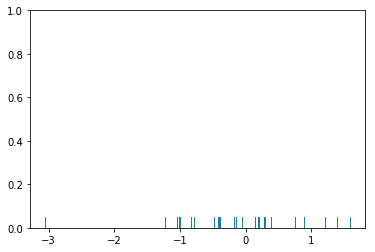

In [4]:
sns.rugplot(dataset)

(array([ 1.,  0.,  0.,  1.,  5.,  4.,  5.,  4.,  2.,  3.]),
 array([-3.04882934, -2.58541996, -2.12201058, -1.6586012 , -1.19519182,
        -0.73178245, -0.26837307,  0.19503631,  0.65844569,  1.12185507,
         1.58526445]),
 <a list of 10 Patch objects>)

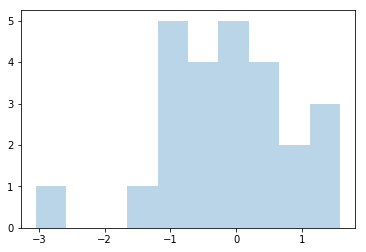

In [5]:
plt.hist(dataset, alpha = 0.3)

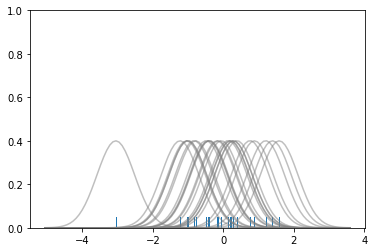

In [10]:
sns.rugplot(dataset)
x_min = dataset.min() -2
x_max = dataset.max() +2
x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**0.2

kernel_list = []
for data_point in dataset:
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    plt.plot(x_axis, kernel, color = 'gray', alpha=0.5)
    plt.ylim(0,1)

Text(0.5,0.98,'Sum of the Basis Functions')

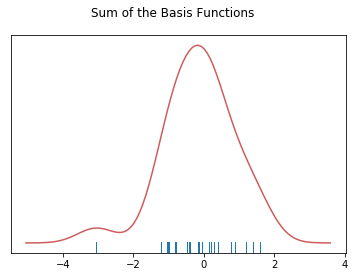

In [11]:
sum_of_kde = np.sum(kernel_list,axis=0)
fig = plt.plot(x_axis,sum_of_kde,color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle('Sum of the Basis Functions')

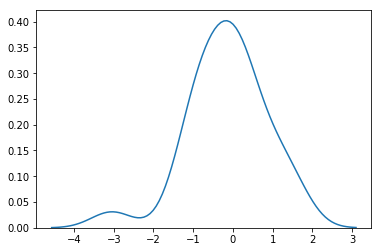

In [12]:
sns.kdeplot(dataset)

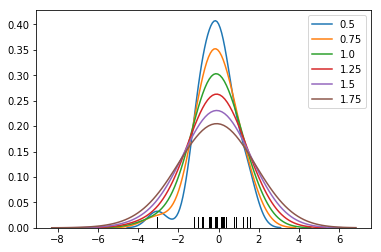

In [16]:
sns.rugplot(dataset, color='black')
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset, bw=bw, label=bw)

/Users/kokubun/.pyenv/versions/3.6.2/envs/tensorflow/lib/python3.6/site-packages/seaborn/distributions.py:279: UserWarning: Kernel other than `gau` requires statsmodels.
  warnings.warn(msg, UserWarning)


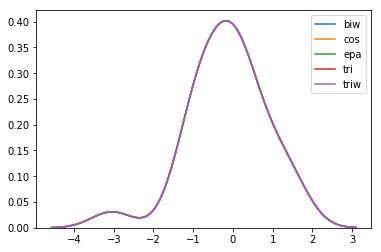

In [25]:
kernel_options = ['biw','cos','epa','tri','triw']
for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern, label=kern)